# Ames, IA Housing Prices - Regression Model
---

# Notebook 01 - Data Cleaning

## Imports

### Libraries

In [1]:
import sys
# Adding path to src code modules
sys.path.append("../")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from src.utilities.graph import my_boxplot, my_histplot, my_scatterplot
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
pd.options.display.max_columns = 1000
pd.options.display.max_rows = 1000

### Data

In [2]:
# Create list of the default na values pandas .read_csv method uses to parse NaN value but remove "NA" from the list
na_values = ['', '#N/A', '#N/A N/A', '#NA', '-1.#IND', '-1.#QNAN', '-NaN', '-nan', '1.#IND', '1.#QNAN', '<NA>', 'N/A', 'NULL', 'NaN', 'n/a', 'nan', 'null']

# Read in CSV with new values for NaN parsing
train = pd.read_csv("../data/raw/train.csv", keep_default_na=False, na_values=na_values)

## Data Cleaning

In [3]:
# Import lists which organize the features in the dataset by type
from src.data.features_by_type import id, categorical, ordinal, numerical

### Exploring Ordinal Variables
The dataset dictionary describes a number of the variables as ordinal although the values in such variables aren't clearly rankable on first glance. I found the following columns to have this characteristic:
- Lot Shape
- Utilities
- Land Slope
- Electrical
- Functional,
- Paved Drive, and
- Fence

This section explores whether the values in these variables can be clearly ranked when compared to the target variable, SalePrice. From this exploration, I chose to treat variables without clear ordinality as categorical variables and converted the values of those with clear ordinality into integers.

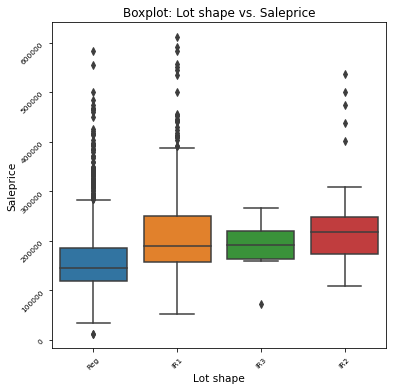

In [4]:
# Plot boxplots of Lot Shape column vs Sale Price to see whether values are clearly ordinal
my_boxplot(train, x_col="Lot Shape", y_col="SalePrice", size=6)

The Lot Shape columns has values of Regular (Reg), Slightly Irregular (IR1), Moderately Irregular (IR2) and Irregular (IR3) which on its face appears to have ordinality. However, this ordinality doesn't show when plotted against SalePrice. Because of this, I chose to treat this column as a categorical variable.

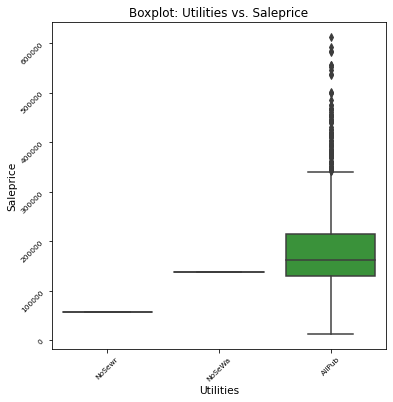

In [5]:
# Plot boxplots of Utilities column vs Sale Price to see whether values are clearly ordinal
my_boxplot(train, x_col="Utilities", y_col="SalePrice", size=6)

The Utilities column has values that can be ranked for worst to best and this relationship appears to hold in the foregoing plot. I chose to map the values of this column into integers.

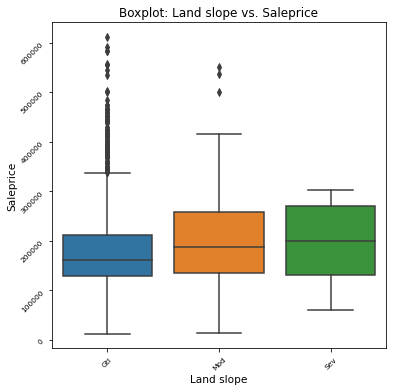

In [6]:
# Plot boxplots of Land Slope column vs Sale Price to see whether values are clearly ordinal
my_boxplot(train, x_col="Land Slope", y_col="SalePrice", size=6)

The Land Slope column's ordinality does not appear to correspond with SalePrice so this column is treated as categorical.

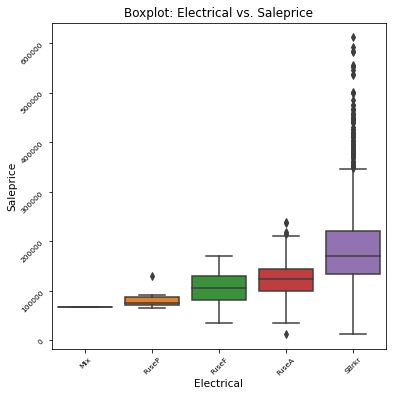

In [7]:
# Plot boxplots of Electrical column vs Sale Price to see whether values are clearly ordinal
my_boxplot(train, x_col="Electrical", y_col="SalePrice", size=6)

Based on the above plot, I chose to map the Electrical column's values to integers

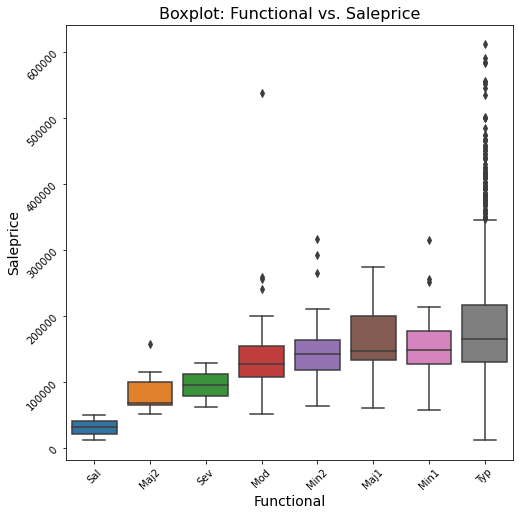

In [8]:
# Plot boxplots of Functional column vs Sale Price to see whether values are clearly ordinal
my_boxplot(train, x_col="Functional", y_col="SalePrice", size=8)

Based on the above plot, I chose to treat the Functional variable as categorical.

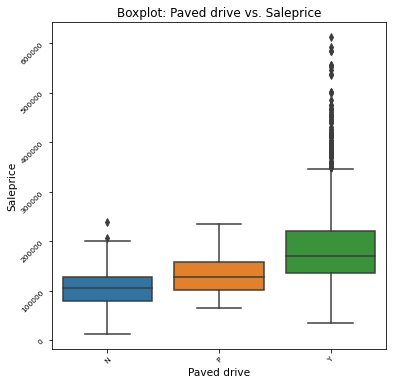

In [9]:
# Plot boxplots of Paved Drive column vs Sale Price to see whether values are clearly ordinal
my_boxplot(train, x_col="Paved Drive", y_col="SalePrice", size=6)

Based on the above plot, I chose to map the values of the Paved Drive column to integers.

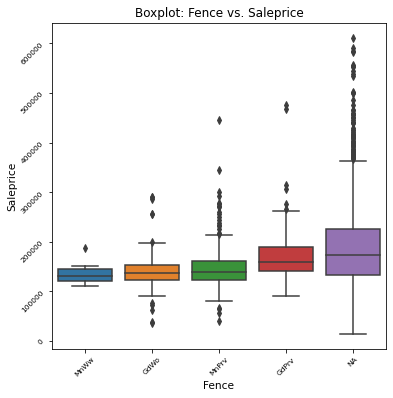

In [10]:
# Plot boxplots of Fence column vs Sale Price to see whether values are clearly ordinal
my_boxplot(train, x_col="Fence", y_col="SalePrice", size=6)

Based on the plot above, I chose to treat the Fence column as categorical.

### Mapping Ordinal Variable Values to Integers

In [11]:
# Dictionaries to map values in the ordinal variables to integers

utilities_integer_map = {
    "AllPub": 4,
    "NoSeWa": 3,
    "NoSewr": 2,
    "ELO": 1
}

electrical_integer_map = {
    "SBrkr": 5,
    "FuseA": 4,
    "FuseF": 3,
    "FuseP": 2,
    "Mix": 1,
}

paved_drive_integer_map = {
    "Y": 3,
    "P": 2,
    "N": 1,
}

# Quality Variables
# A fair number of the ordinal variables appear to use the same scale to measure quality, ranging from Poor to Excellent. 
# Some of these variables also include a value of NA to note that feature being measured is absent from the observation.
# The values of these variables were converted with the dictionary below.

quality_integer_map = {
    "Ex": 5,
    "Gd": 4,
    "TA": 3,
    "Fa": 2,
    "Po": 1,
    "NA": 0
}

# The following variables use quality scales that are unique and thus required separate dictionaries for mapping

bsmt_exposure_integer_map = {
    "Gd": 4,
    "Av": 3,
    "Mn": 2,
    "No": 1,
    "NA": 0
}

# For both BsmtFin Type 1 and BsmtFin Type 2
bsmt_fin_type_integer_map = {
    "GLQ": 6,
    "ALQ": 5,
    "BLQ": 4,
    "Rec": 3,
    "LwQ": 2,
    "Unf": 1,
    "NA": 0
}

garage_finish_integer_map = {
    "Fin": 3,
    "RFn": 2,
    "Unf": 1,
    "NA": 0
}

### Data Cleaning Function

In [12]:
# Function to clean/process data
def clean_data(df):
    # Create new copy of dataframe
    new_df = df.copy()

    # Convert MS Subclass column to object
    new_df["MS SubClass"] = new_df["MS SubClass"].astype("object")

    # Convert values of ordinal variables to integers
    new_df["Utilities"] = new_df["Utilities"].map(utilities_integer_map)
    new_df["Electrical"] = new_df["Electrical"].map(electrical_integer_map)
    new_df["Paved Drive"] = new_df["Paved Drive"].map(paved_drive_integer_map)
    # Quality variables
    new_df["Exter Qual"] = new_df["Exter Qual"].map(quality_integer_map)
    new_df["Exter Cond"] = new_df["Exter Cond"].map(quality_integer_map)
    new_df["Bsmt Qual"] = new_df["Bsmt Qual"].map(quality_integer_map)
    new_df["Bsmt Cond"] = new_df["Bsmt Cond"].map(quality_integer_map)
    new_df["Heating QC"] = new_df["Heating QC"].map(quality_integer_map)
    new_df["Kitchen Qual"] = new_df["Kitchen Qual"].map(quality_integer_map)
    new_df["Fireplace Qu"] = new_df["Fireplace Qu"].map(quality_integer_map)
    new_df["Garage Qual"] = new_df["Garage Qual"].map(quality_integer_map)
    new_df["Garage Cond"] = new_df["Garage Cond"].map(quality_integer_map)
    new_df["Pool QC"] = new_df["Pool QC"].map(quality_integer_map)
    # Variables with unique scales
    new_df["Bsmt Exposure"] = new_df["Bsmt Exposure"].map(bsmt_exposure_integer_map)
    new_df["BsmtFin Type 1"] = new_df["BsmtFin Type 1"].map(bsmt_fin_type_integer_map)
    new_df["BsmtFin Type 2"] = new_df["BsmtFin Type 2"].map(bsmt_fin_type_integer_map)
    new_df["Garage Finish"] = new_df["Garage Finish"].map(garage_finish_integer_map)

    


    return new_df


In [13]:
train = clean_data(train)

### Missing Values

In [14]:
# Display missing values in categorical features
train[categorical].isnull().sum().sort_values(ascending=False).head(2)

Mas Vnr Type    22
MS SubClass      0
dtype: int64

In [15]:
# Display missing values in numerical features
train[numerical].isnull().sum().sort_values(ascending=False).head(10)

Lot Frontage     330
Garage Yr Blt    114
Mas Vnr Area      22
Garage Area        1
BsmtFin SF 1       1
BsmtFin SF 2       1
Bsmt Unf SF        1
Total Bsmt SF      1
Pool Area          0
Screen Porch       0
dtype: int64

In [16]:
# Display missing values in ordinal features
train[ordinal].isnull().sum().sort_values(ascending=False).head(12)

Bsmt Exposure     4
Bsmt Half Bath    2
BsmtFin Type 2    2
Bsmt Full Bath    2
BsmtFin Type 1    1
Garage Cond       1
Garage Qual       1
Bsmt Qual         1
Bsmt Cond         1
Garage Cars       1
Garage Finish     1
Fireplaces        0
dtype: int64

The following columns have missing values:
- Mas Vnr Type
- Mas Vnr Area
- Lot Frontage
- Garage Yr Blt
- Garage Area
- BsmtFin SF 1
- BsmtFin SF 2
- Bsmt Unf SF
- Total Bsmt SF
- Bsmt Exposure
- Bsmt Half Bath
- Bsmt Full Bath
- BsmtFin Type 2
- BsmtFin Type 1
- Garage Cars
- Garage Finish
- Garage Cond
- Bsmt Qual
- Bsmt Cond
- Garage Qual

#### Mas Vnr Type

In [17]:
# Percentage of rows with missing value in Mas Vnr Type column
train["Mas Vnr Type"].isnull().sum() / len(train)

0.010726474890297415

In [18]:
# View value counts by percentage
train["Mas Vnr Type"].value_counts(normalize=True)

None       0.600296
BrkFace    0.310498
Stone      0.082799
BrkCmn     0.006407
Name: Mas Vnr Type, dtype: float64

I chose to fill in the missing values in the Mas Vnr Type column with the most common value, None. 

In [19]:
train["Mas Vnr Type"] = train["Mas Vnr Type"].fillna("None")

#### Mas Vnr Area
To correspond with my imputation of Mas Vnr Type of "None", I chose to impute the missing values for the Mas Vnr Area column in the same observations as 0.0.

In [20]:
train["Mas Vnr Area"] = train["Mas Vnr Area"].fillna(0)

#### Lot Frontage

In [21]:
# Percentage of rows with missing value in Lot Frontage column
train["Lot Frontage"].isnull().sum() / len(train)

0.16089712335446124

In [22]:
# Summary statistics on Lot Frontage
train["Lot Frontage"].describe()

count    1721.000000
mean       69.055200
std        23.260653
min        21.000000
25%        58.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: Lot Frontage, dtype: float64

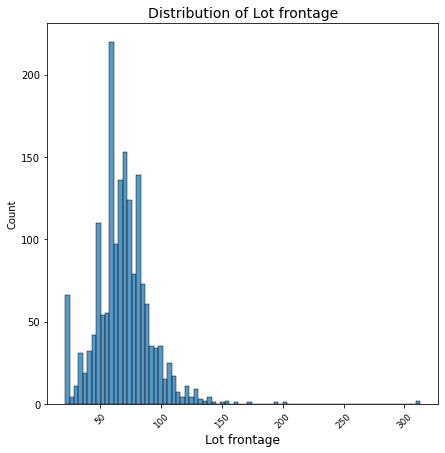

In [23]:
# Plot distribution
my_histplot(train, x_col = "Lot Frontage", size=7)

In [24]:
# Show the types of Bldg Types with Lot Frontage under 25
train[train["Lot Frontage"] < 25]["Bldg Type"].value_counts()

Twnhs     53
TwnhsE    13
Name: Bldg Type, dtype: int64

In [25]:
# Show summary statistics on Lot Frontage by Bldg Type
train.groupby("Bldg Type")["Lot Frontage"].describe()

,count,mean,std,min,25%,50%,75%,max
Bldg Type,,,,,,,,
1Fam,1415.0,73.485512,20.834355,30.0,60.0,70.0,82.0,313.0
2fmCon,44.0,71.340909,23.516390,50.0,60.0,64.0,75.0,195.0
Duplex,63.0,69.396825,14.440690,33.0,61.5,70.0,76.0,113.0
Twnhs,63.0,24.507937,5.148984,21.0,21.0,24.0,24.0,40.0
TwnhsE,136.0,42.698529,15.149781,21.0,34.0,41.0,50.0,135.0


The histogram for Lot Frontage shows an outlier group of homes with a Lot Frontage of less than 25 ft. These appear to be all Townhouses. The summary statistics shows distinct differences in the mean Lot Frontage between the two different types of Townhomes and the other Bldg Types. These led me to conclude that when imputing the values for Lot Frontage, the values for any Townhomes should be calculated separately from the other building types.

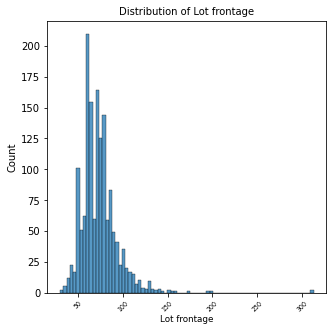

In [26]:
not_townhomes = train[train["Bldg Type"].isin(["1Fam", "2fmCon", "Duplex"])]
my_histplot(not_townhomes, x_col="Lot Frontage", size=5)

There also appears to be outlier data points with Lot Frontages of over 200ft. I chose to exclude these from the dataset when imputing Lot Frontage values.

In [27]:
not_townhomes_under200 = not_townhomes[not_townhomes["Lot Frontage"] < 200]

In [28]:
not_townhomes_under200.groupby("Lot Config")["Lot Frontage"].describe()

,count,mean,std,min,25%,50%,75%,max
Lot Config,,,,,,,,
Corner,270.0,83.381481,21.471318,40.0,66.25,81.0,95.00,153.0
CulDSac,65.0,57.030769,17.374523,35.0,43.00,52.0,64.00,118.0
FR2,34.0,74.500000,27.800425,38.0,60.00,67.5,83.75,195.0
FR3,7.0,91.000000,29.765752,60.0,65.00,90.0,114.00,129.0
Inside,1143.0,71.108486,16.049522,30.0,60.00,70.0,80.00,174.0


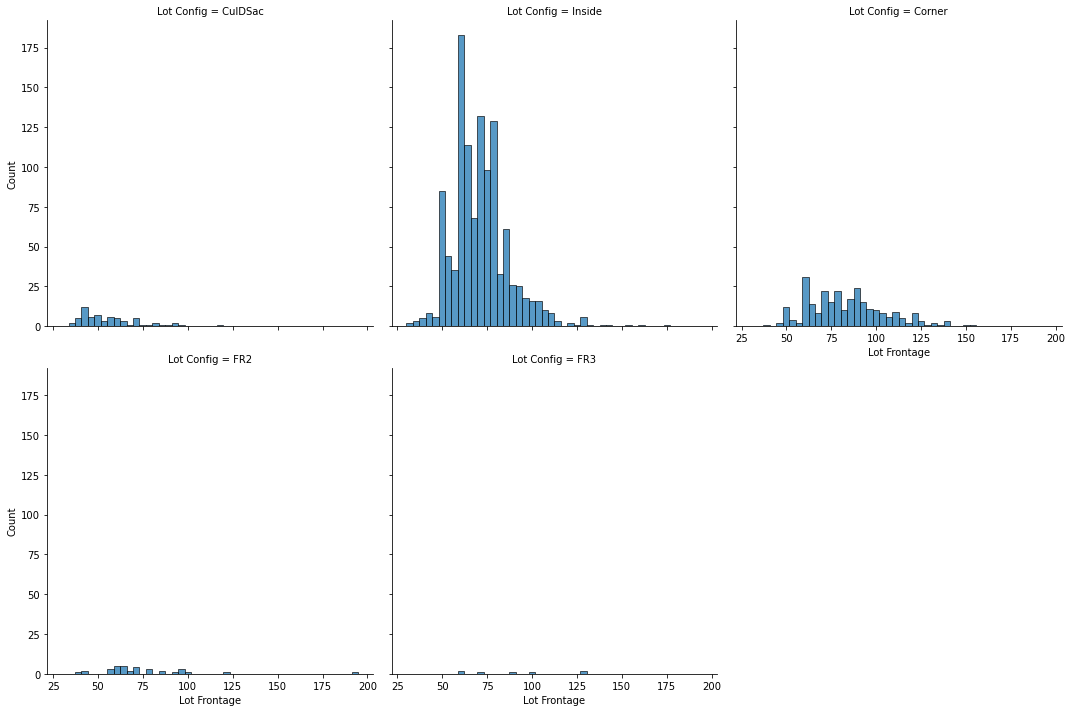

In [29]:
sns.displot(not_townhomes_under200, x="Lot Frontage", col="Lot Config", col_wrap = 3)

Among the remaining homes, the only other feature that I felt would significantly affect the value of Lot Frontage was Lot Config. As expected, homes on corner lots on average have more linear feet of street connected to the property than inside lots which have more lot frontage on average than lots in cul-de-sacs.

From here, I decided to impute missing Lot Frontage values using the code below which filled in missing Lot Frontage values for Townhouses with the mean Lot Frontage for the specific type of townhouse. For all other Bldg Types, I imputed the value using the mean Lot Frontage by the type of Lot Config for the property.

In [30]:
townhouse_mean_lot_frontage = train[train["Bldg Type"].isin(["Twnhs", "TwnhsE"])].groupby("Bldg Type")["Lot Frontage"].mean().to_dict()

house_mean_lot_frontage = not_townhomes_under200.groupby("Lot Config")["Lot Frontage"].mean().to_dict()

def impute_lot_frontage(row):
    if row['Bldg Type'] in ["Twnhs", "TwnhsE"]:
        return townhouse_mean_lot_frontage[row["Bldg Type"]]
    else:
        return house_mean_lot_frontage[row['Lot Config']]


In [31]:
imputed_lot_frontage_values = train[train["Lot Frontage"].isnull()].apply(lambda x: impute_lot_frontage(x), axis=1)
train.loc[imputed_lot_frontage_values.index, "Lot Frontage"] = imputed_lot_frontage_values
# train.apply(lambda x: impute_lot_frontage(x), axis=1)

#### Garage Yr Built

In [32]:
train["Garage Yr Blt"].isnull().sum() / len(train)

0.05558264261335934

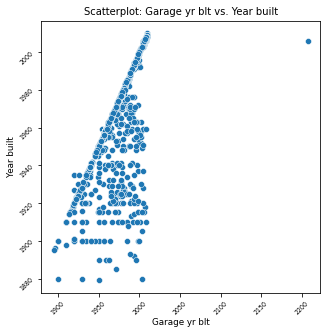

In [33]:
my_scatterplot(train, x_col="Garage Yr Blt", y_col="Year Built", size=5)

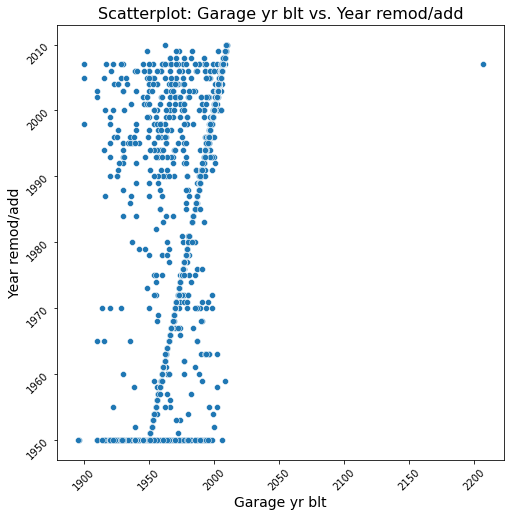

In [34]:
my_scatterplot(train, x_col="Garage Yr Blt", y_col="Year Remod/Add", size=8)

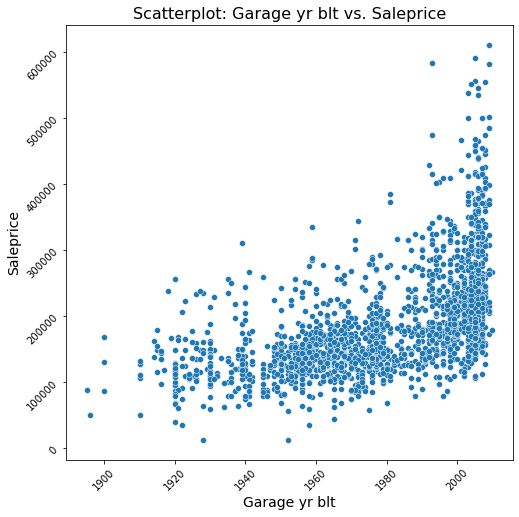

In [35]:
my_scatterplot(train[train["Garage Yr Blt"] <2020], x_col="Garage Yr Blt", y_col="SalePrice", size=8)

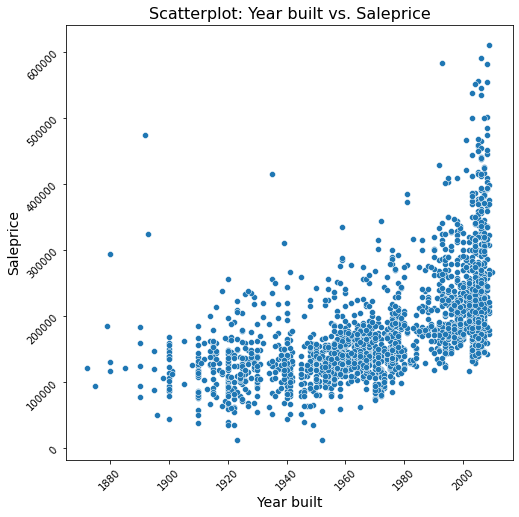

In [36]:
my_scatterplot(train, x_col="Year Built", y_col="SalePrice", size=8)

<AxesSubplot:>

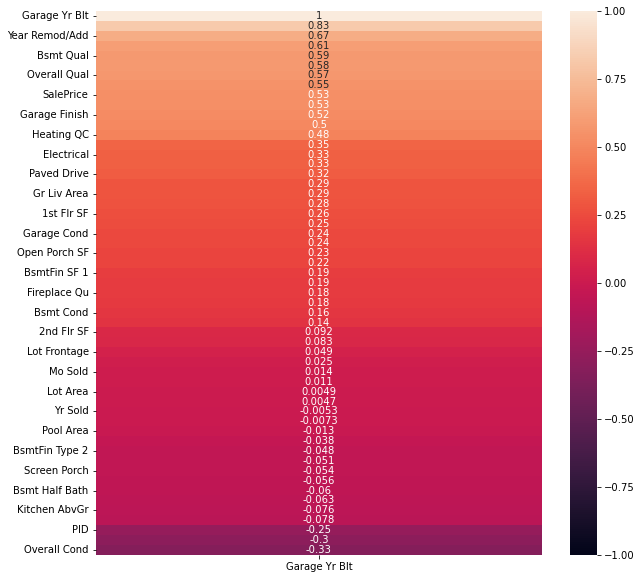

In [37]:
garage_corr = train.corr()[["Garage Yr Blt"]].sort_values(by="Garage Yr Blt", ascending=False)
plt.figure(figsize=(10,10))
sns.heatmap(garage_corr, vmin=-1, vmax=1, annot=True)

Because of its strong collinearity with the Year Built variable and other garage related variables, it doesn't seem likely that this variable has any more useful information that is not already captured elsewhere. I elected to drop this feature.

In [38]:
train.drop(columns="Garage Yr Blt", inplace=True)

#### Garage Area, Garage Cars, Garage Finish, Garage Cond

The missing values in these columns corresponding with just 1 observation. I elected to drop this observation from the data.

In [39]:
train.drop(index=1712, inplace=True)

#### Bsmt Qual, Bsmt Cond, Bsmt Type 1, BsmtFin SF 1, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF

The missing values in this column come from just 1 observation. I chose to drop this row from the data.

In [40]:
train.drop(index=1327, inplace=True)

#### Bsmt Full Bath, Bsmt Half Bath

The missing values for these two columns relate to one observation where it can be inferred from the other data that no basement exists. I chose to fill in the values here with 0.

In [41]:
train.loc[616, "Bsmt Full Bath"] = 0
train.loc[616, "Bsmt Half Bath"] = 0

#### BsmtFin Type 2
The missing value in this column relates to one observation which provides a positive value for square footage of finished basement type 2. I chose to impute the value here with the most common category of BsmtFin Type 2 after the Unfinished category which is Rec or integer value 3.

In [43]:
train[train["BsmtFin Type 2"].isnull()]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1147,445,528142130,20,RL,85.0,10655,Pave,NA,IR1,Lvl,4,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2003,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,296.0,4,3,PConc,4.0,3.0,1.0,6.0,1124.0,NaN,479.0,1603.0,3206.0,GasA,5,Y,5,1629,0,0,1629,1.0,0.0,2,0,3,1,4,7,Typ,1,4,Attchd,2.0,3.0,880.0,3.0,3.0,3,0,0,0,0,0,0,0,NA,NA,0,10,2009,WD,284000


In [44]:
train["BsmtFin Type 2"].value_counts(normalize=True)

1.0    0.853516
3.0    0.039062
2.0    0.029297
0.0    0.026367
4.0    0.023438
5.0    0.017090
6.0    0.011230
Name: BsmtFin Type 2, dtype: float64

In [45]:
train.loc[1147, "BsmtFin Type 2"] = 3.0

#### Bsmt Exposure

The remaining missing values in this column relate to 3 observations. I chose to impute the value of these as the most common value found in the column, "No" (no exposure).

In [46]:
train[train["Bsmt Exposure"].isnull()]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1456,1797,528458090,60,FV,81.0,10411,Pave,NA,Reg,Lvl,4,Corner,Gtl,Somerst,Norm,Norm,1Fam,2Story,5,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,4,3,CBlock,4.0,3.0,NaN,1.0,0.0,1.0,0.0,725.0,725.0,GasA,5,Y,5,725,863,0,1588,0.0,0.0,3,0,3,1,4,8,Typ,0,0,Attchd,1.0,2.0,561.0,3.0,3.0,3,0,0,0,0,0,0,0,NA,NA,0,7,2007,New,212109
1547,67,528445060,20,RL,73.0,8987,Pave,NA,Reg,Lvl,4,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,226.0,4,3,PConc,4.0,3.0,NaN,1.0,0.0,1.0,0.0,1595.0,1595.0,GasA,5,Y,5,1595,0,0,1595,0.0,0.0,2,0,2,1,4,6,Typ,1,4,Attchd,2.0,3.0,880.0,3.0,3.0,3,144,0,0,0,0,0,0,NA,NA,0,5,2010,WD,221500
1997,2780,907194130,60,RL,65.0,14006,Pave,NA,IR1,Lvl,4,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,144.0,4,3,PConc,4.0,3.0,NaN,1.0,0.0,1.0,0.0,936.0,936.0,GasA,5,Y,5,936,840,0,1776,0.0,0.0,2,1,3,1,4,7,Typ,1,3,Attchd,2.0,2.0,474.0,3.0,3.0,3,144,96,0,0,0,0,0,NA,NA,0,2,2006,WD,192500


In [47]:
train["Bsmt Exposure"].value_counts(normalize=True)

1.0    0.653959
3.0    0.140762
4.0    0.099218
2.0    0.079668
0.0    0.026393
Name: Bsmt Exposure, dtype: float64

In [48]:
train["Bsmt Exposure"] = train["Bsmt Exposure"].fillna(1.0)

## Export to CSV

In [49]:
train.to_csv("../data/interim/train_cleaned.csv", index=False)